# Week6 - Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cat_var = [var for var in df.columns if df[var].dtype=='O']
cat_var

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [9]:
df[cat_var].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [10]:
for var in cat_var:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

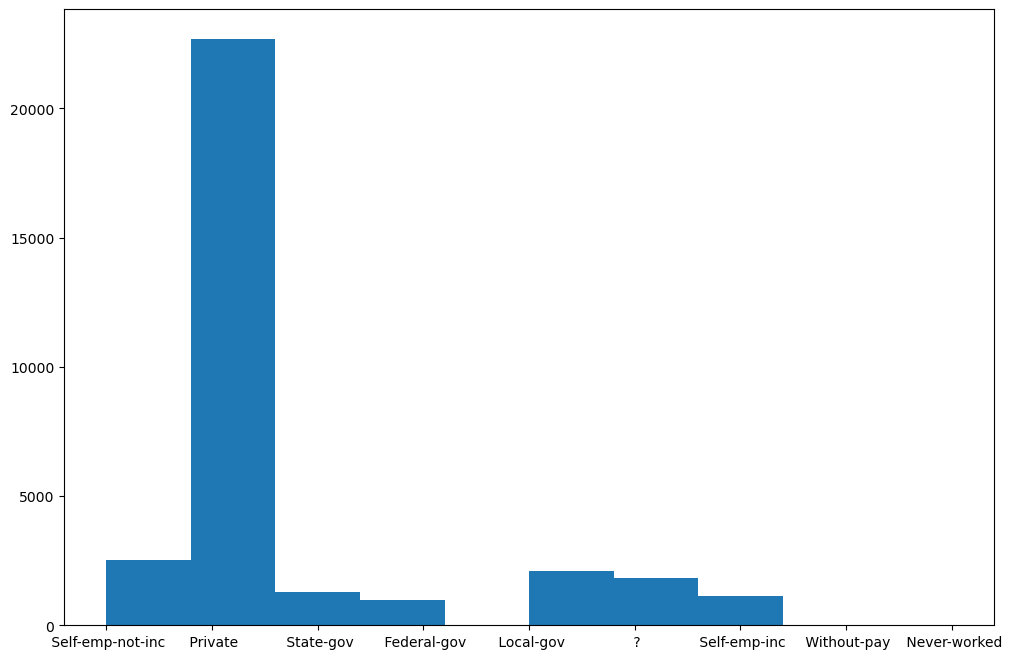

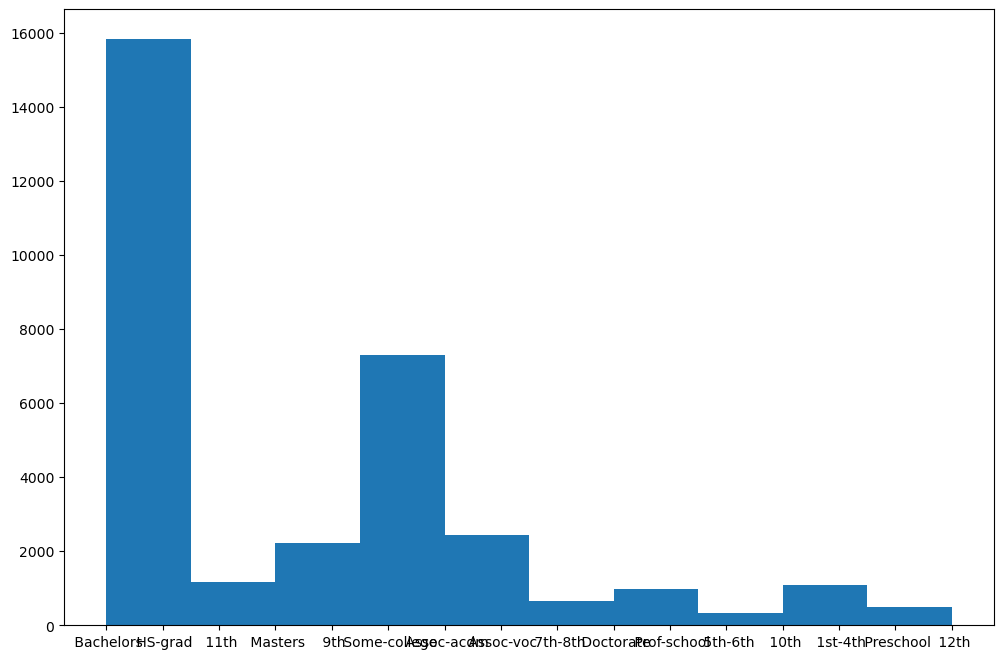

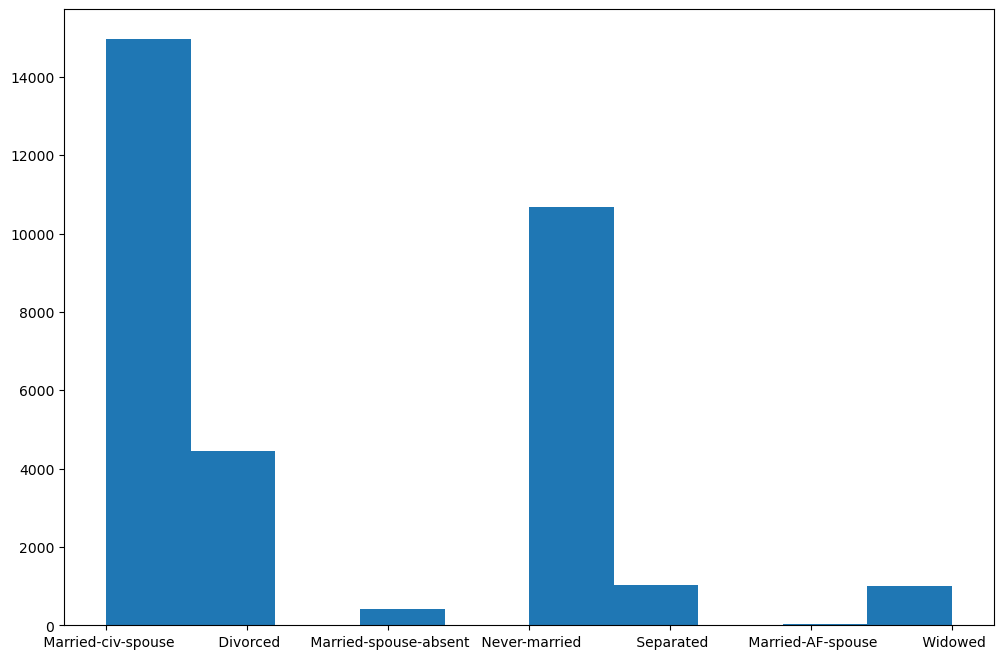

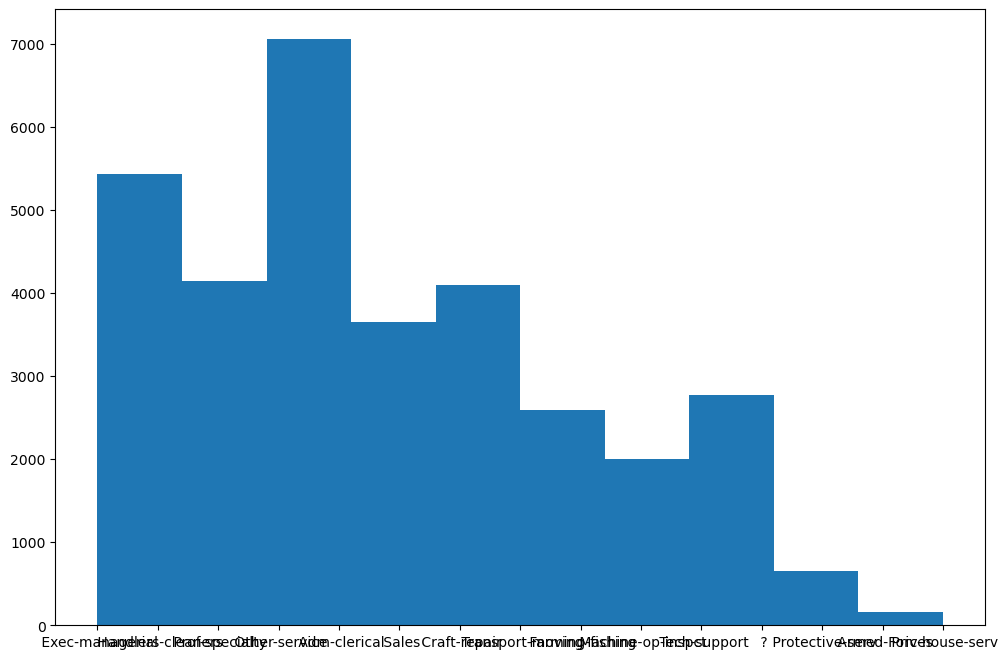

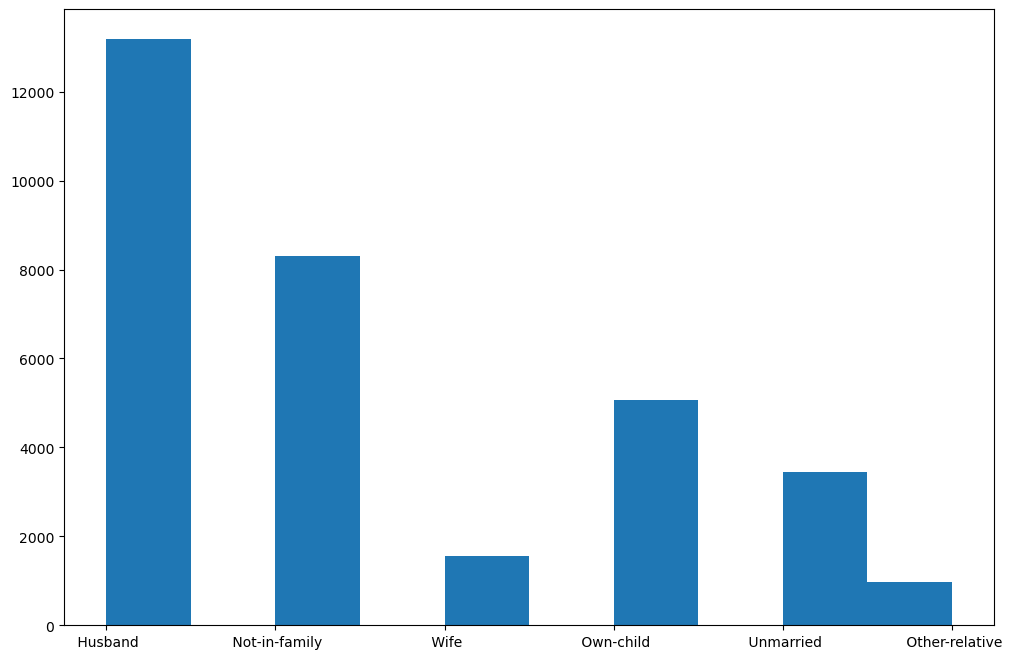

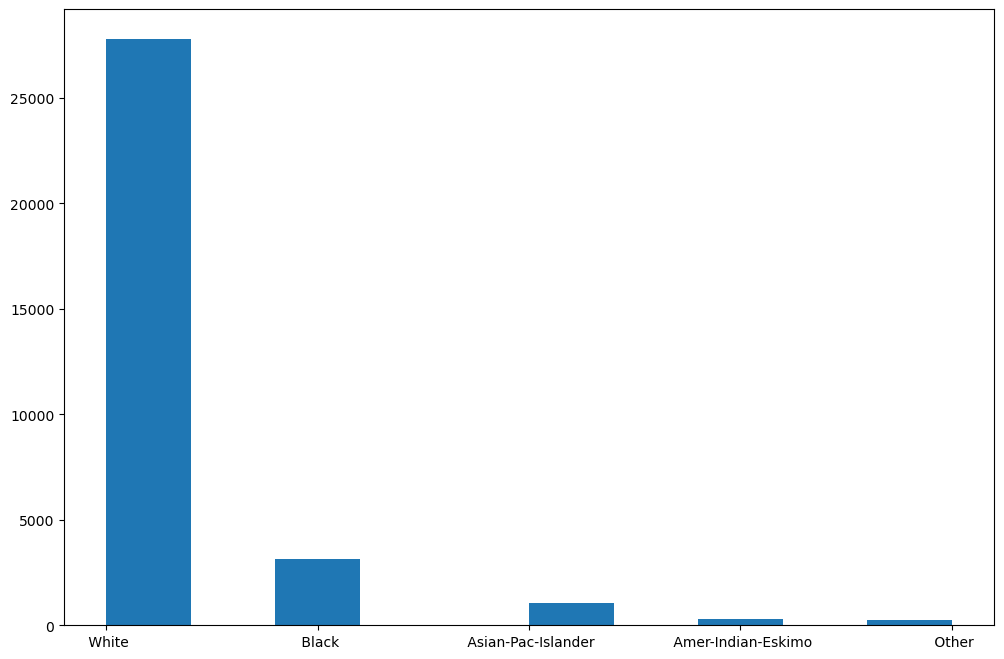

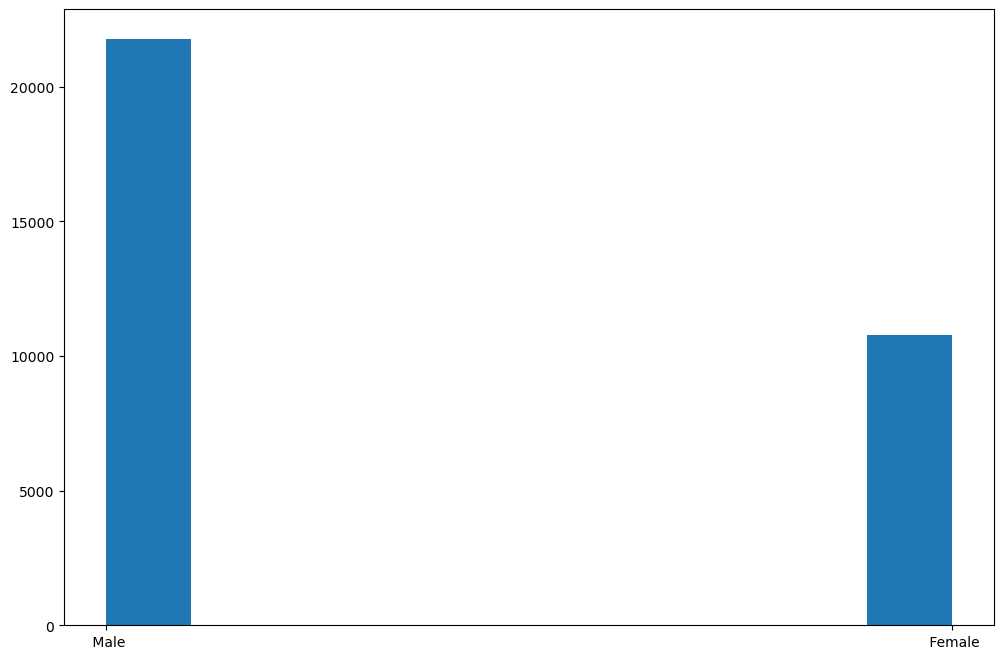

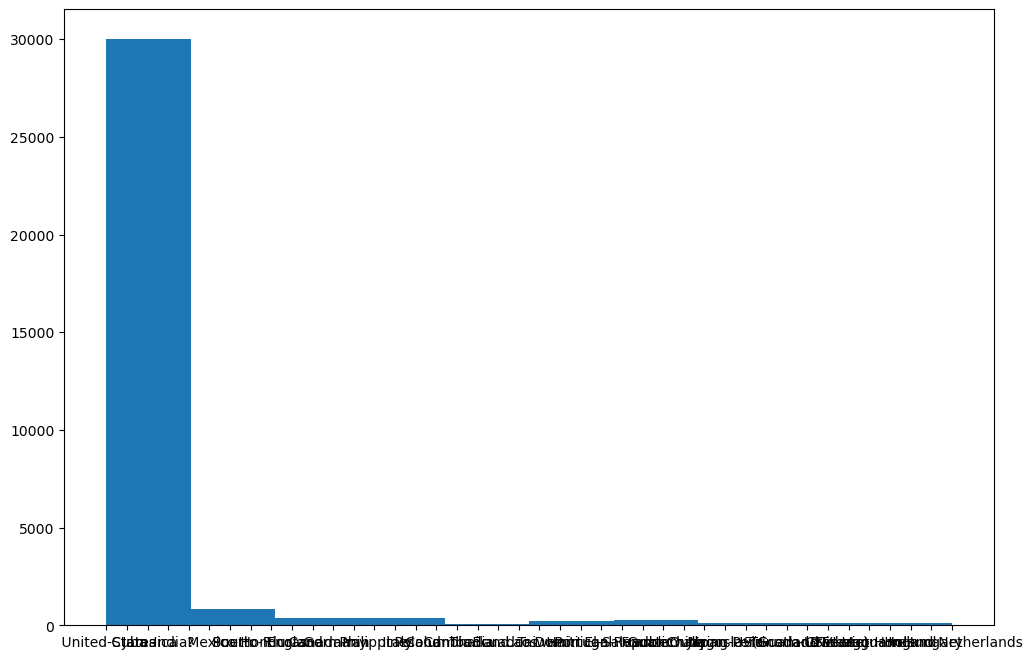

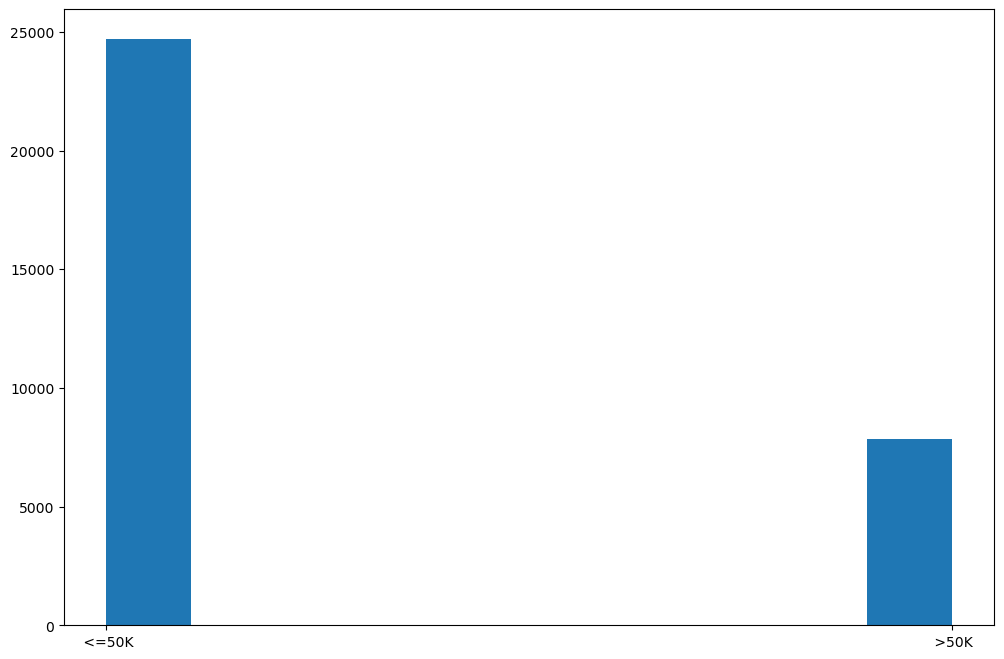

In [11]:
for var in cat_var:
    plt.figure(figsize=(12,8))
    plt.hist(df[var])
    plt.show()

In [12]:
for var in cat_var:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [13]:
def replace_with_NaN(x):
    if x.strip() == '?':
        return np.nan
    else:
        return x

In [14]:
for var in cat_var:
    df[var].apply(replace_with_NaN)

In [15]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [16]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

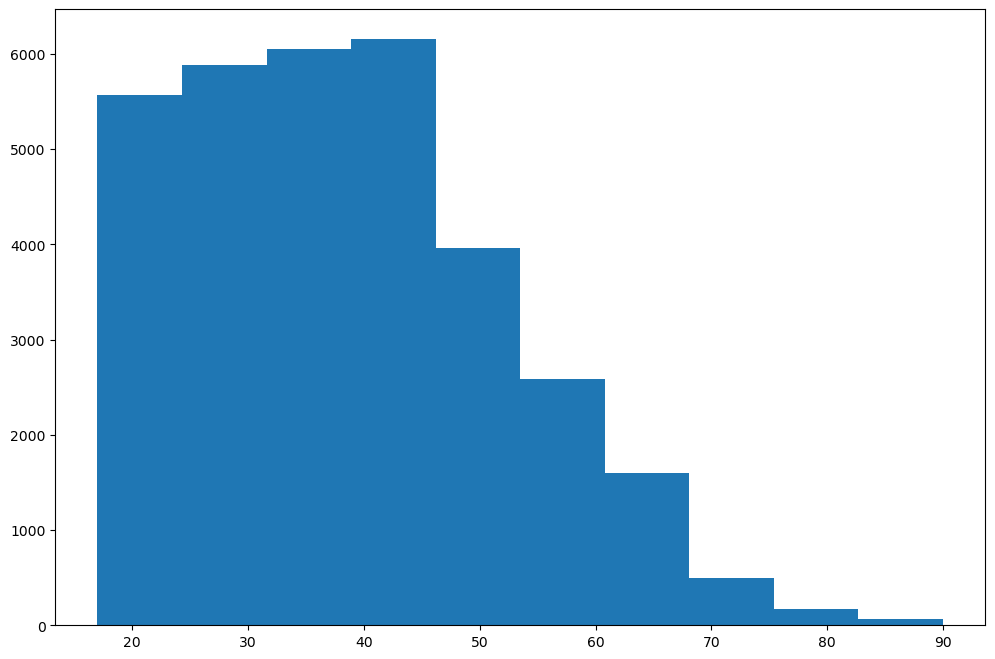

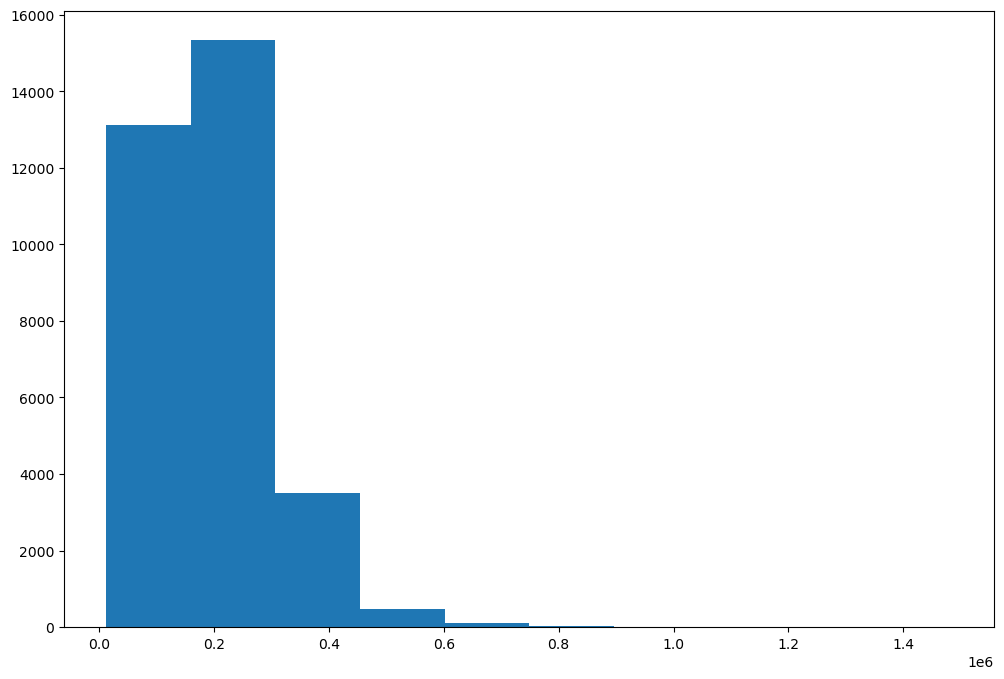

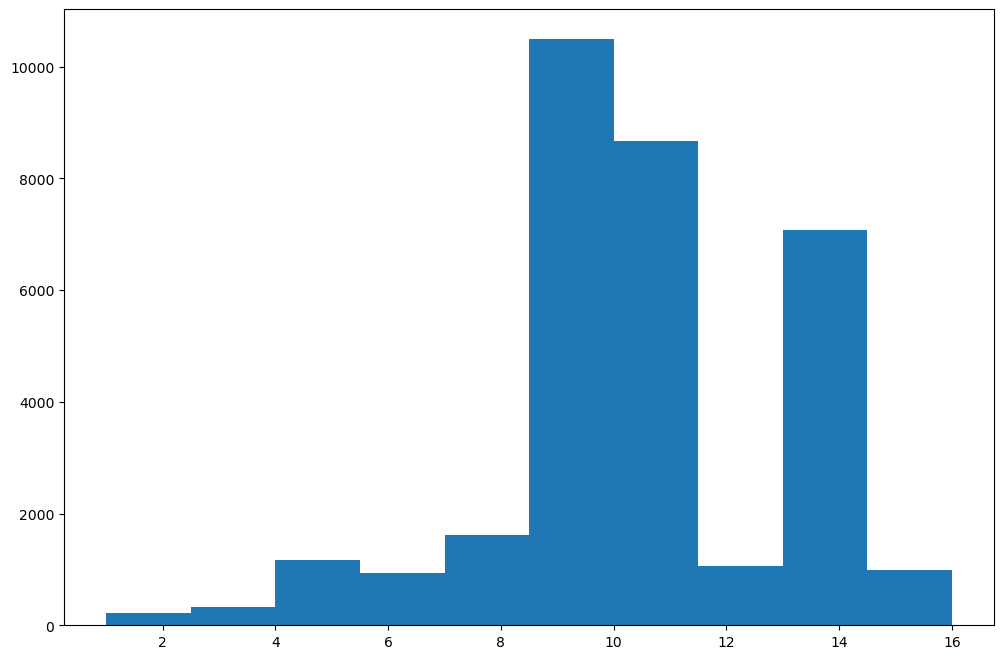

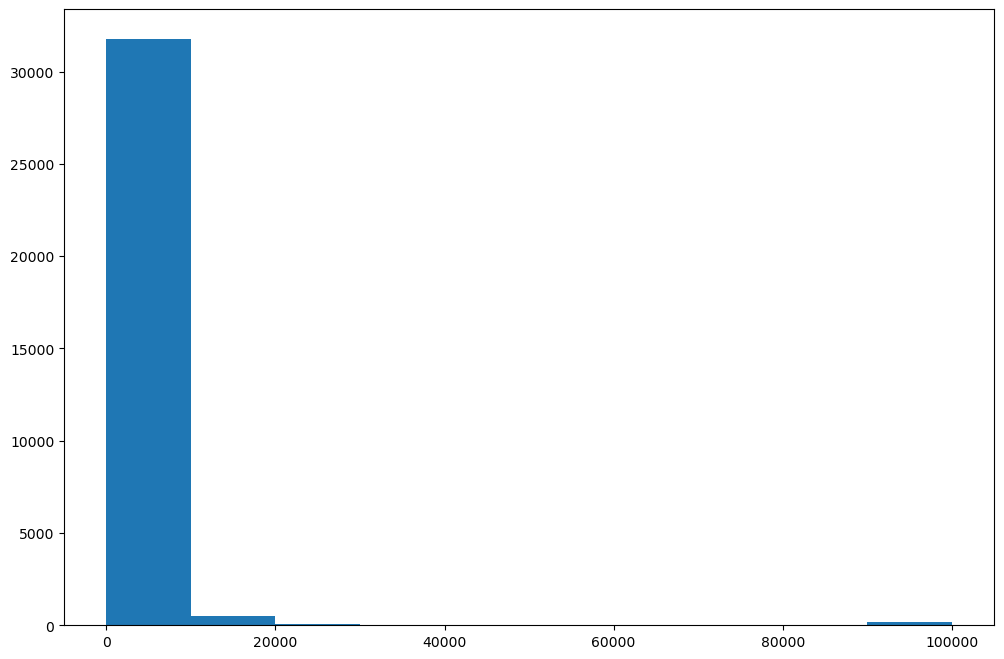

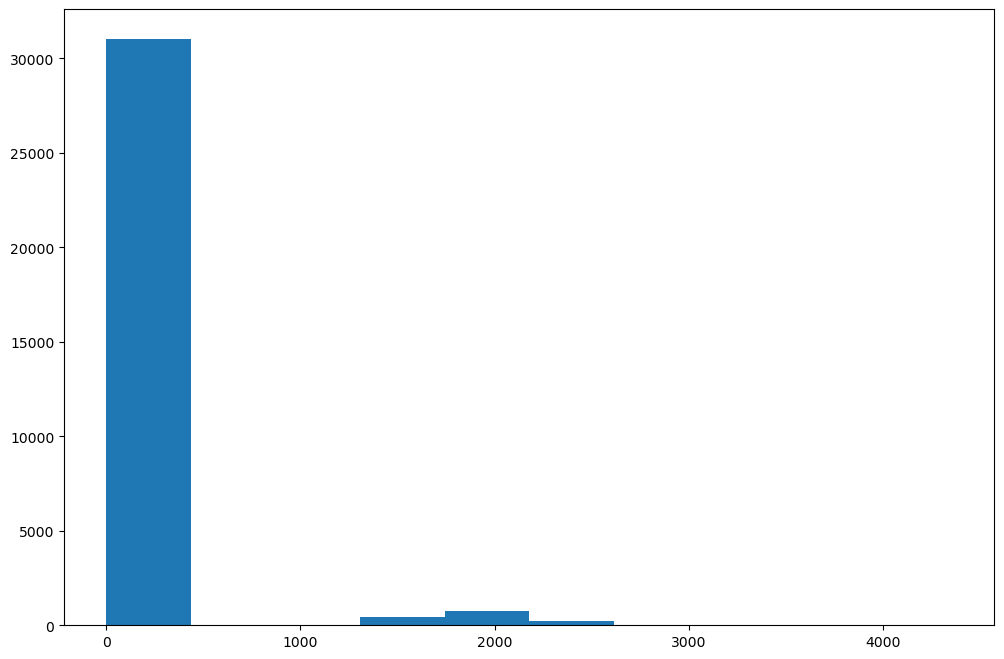

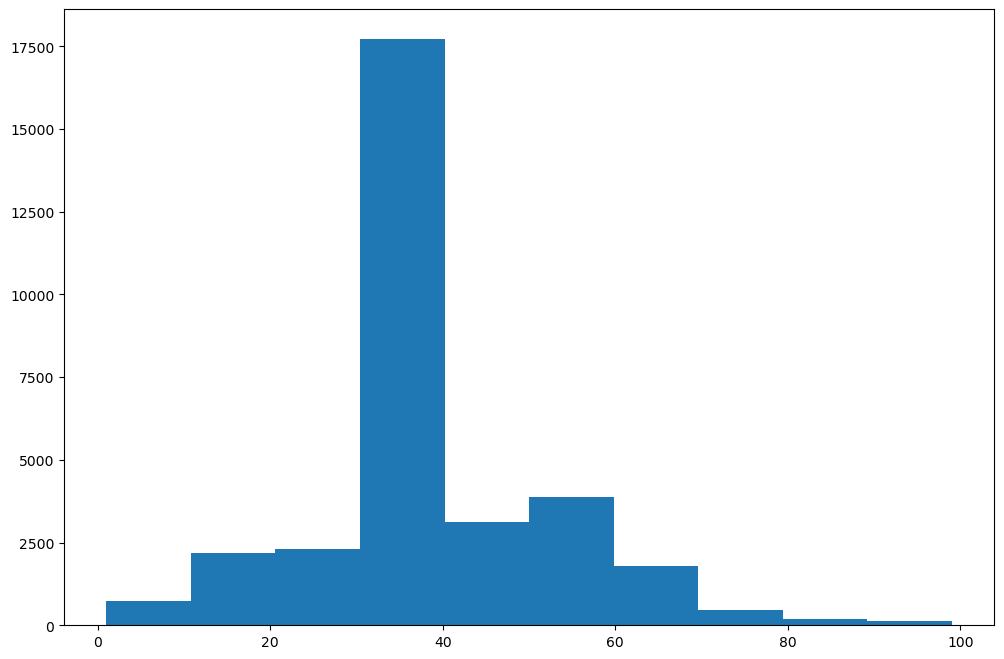

In [17]:
for var in numerical:
    plt.figure(figsize=(12,8))
    plt.hist(df[var])
    plt.show()

In [18]:
X=df.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [19]:
y=df.iloc[:,-1]
y = np.where(y == ' >50K', 1, 0)
y

array([0, 0, 0, ..., 0, 0, 1])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
cat=[var for var in X.columns if X[var].dtype=='O']
num=[var for var in X.columns if X[var].dtype!='O']

In [23]:
X_train[cat].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [24]:
X_test[cat].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [25]:
X_train[num].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [26]:
X_test[num].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [27]:
import category_encoders as ce

In [28]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [29]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
12467,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15282,54,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24869,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18822,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26403,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,43,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,21,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
22278,40,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8950,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16505,21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19140,59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21297,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7694,51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10410,67,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1043,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
cols = X_train.columns

In [32]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-0.15,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.85, -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.1 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.3 , -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.8 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.6 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [34]:
X_test

array([[ 0.15, -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.45,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.2 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 1.5 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.65,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [35]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [36]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,-0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.85,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26044,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26045,0.30,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26046,-0.80,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,0.15,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6508,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6509,1.50,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6510,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
model=GaussianNB()

In [32]:
model.fit(X_train,Y_train)

GaussianNB()

In [33]:
Y_pred=model.predict(X_test)

In [34]:
Y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [35]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report

In [36]:
accuracy_score(Y_test,Y_pred)

0.7936117936117936

In [37]:
Y_train_pred=model.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.7938037469287469

In [38]:
print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

Training set score: 0.7938
Test set score: 0.7936


In [39]:
confusion_matrix(Y_test, Y_pred)

array([[4699,  258],
       [1086,  469]], dtype=int64)

In [40]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4957
           1       0.65      0.30      0.41      1555

    accuracy                           0.79      6512
   macro avg       0.73      0.62      0.64      6512
weighted avg       0.77      0.79      0.76      6512



In [41]:
cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4699  258]
 [1086  469]]

True Positives(TP) =  4699

True Negatives(TN) =  469

False Positives(FP) =  258

False Negatives(FN) =  1086


<Axes: >

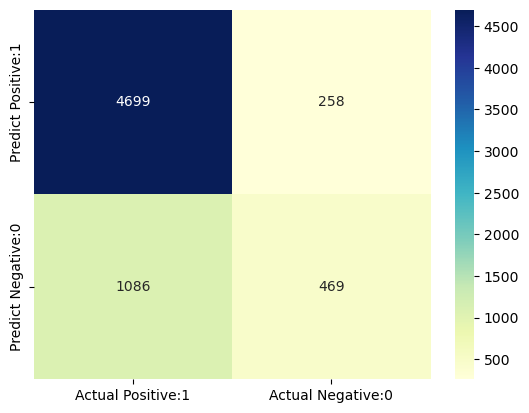

In [42]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [44]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7936


In [45]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2064


In [61]:
class_prob={}

pred_class_0 = model.predict_proba(X_test)[:,0]

pred_class_1 = model.predict_proba(X_test)[:,1]

class_prob[0] = np.mean(pred_class_0,axis=0)
class_prob[1] = np.mean(pred_class_1,axis=0)

In [69]:
class_probabilities = pd.DataFrame(class_prob, index=[0])

class_probabilities

,0,1
0,0.879762,0.120238


In [63]:
class_prob

{0: 0.8797618511470268, 1: 0.1202381488529733}

In [71]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold(n_splits=10,random_state=5,shuffle=True)
roc_score = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='roc_auc')
roc_score

array([0.84531421, 0.84285721, 0.81826532, 0.81711225, 0.83318316,
       0.81800704, 0.84082497, 0.83233767, 0.83026256, 0.83025002])

In [59]:
import numpy as np

# Assuming model is already trained and X_test contains test data

# Calculate predicted probabilities for each class
pred_probabilities = model.predict_proba(X_test)

# Calculate class probabilities
class_prob = {}
class_prob[0] = np.mean(pred_probabilities[:, 0])  # Probability for class 0
class_prob[1] = np.mean(pred_probabilities[:, 1])  # Probability for class 1

print("Class probabilities:", class_prob)

Class probabilities: {0: 0.8797618511470268, 1: 0.1202381488529733}


In [56]:
def calculate_class_probabilities(y_train):
    # Calculate the total number of samples
    total_samples = len(y_train)
    
    # Get unique class labels
    unique_classes = np.unique(y_train)
    
    # Calculate the number of samples for each class
    class_probabilities = {}
    for cls in unique_classes:
        class_samples = np.sum(y_train == cls)
        class_probabilities[cls] = class_samples / total_samples
    
    return class_probabilities

# Assuming y_train is your training labels
class_probabilities = calculate_class_probabilities(Y_train)
print("Class Probabilities:", class_probabilities)

Class Probabilities: {0: 0.7586762899262899, 1: 0.24132371007371006}


In [54]:
predicted_probabilities = model.predict_proba(X_test)
predicted_probabilities

array([[4.59552521e-02, 9.54044748e-01],
       [9.99975591e-01, 2.44090764e-05],
       [9.99999939e-01, 6.05697539e-08],
       ...,
       [2.62465328e-02, 9.73753467e-01],
       [9.99993722e-01, 6.27815991e-06],
       [1.92527153e-02, 9.80747285e-01]])

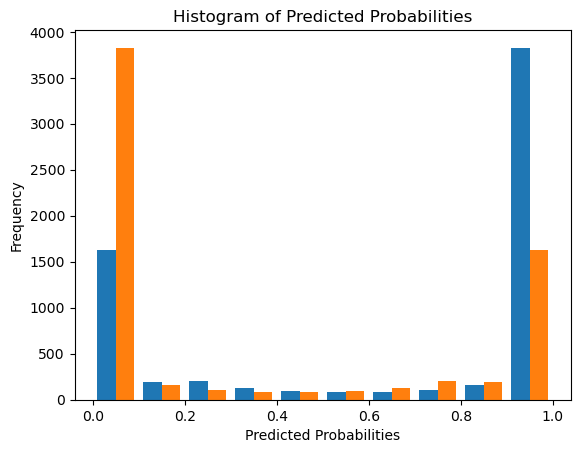

In [55]:
import matplotlib.pyplot as plt

# Assuming 'predicted_probabilities' is a numpy array containing predicted probabilities
plt.hist(predicted_probabilities, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()


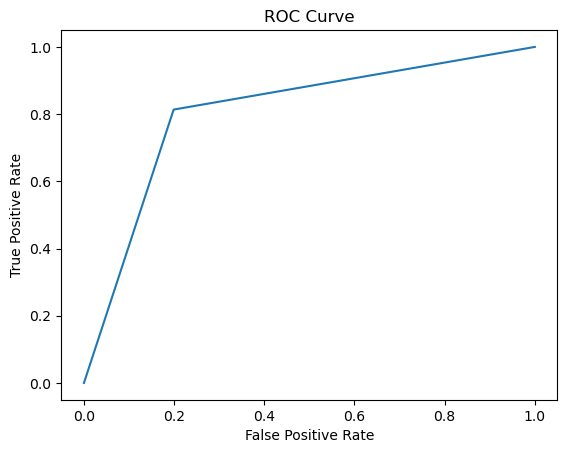

In [58]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming 'y_true' contains true labels and 'predicted_probabilities' contains predicted probabilities
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

# Assuming 'y_true' contains true labels and 'predicted_probabilities' contains predicted probabilities
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8072970958604124
